<a href="https://colab.research.google.com/github/Sanwar021/CSE475/blob/main/CSE475(3)LAB_3(UPDATED).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn imbalanced-learn xgboost matplotlib seaborn shap lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=60efce28714e0a707615301fe5a8bedfc1010832034174339a152648154ea377
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# ===================
# 1. Import Libraries
# ===================
# Import necessary libraries for data handling, modeling, and evaluation.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE
import shap
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully.")


Libraries imported successfully.


In [ ]:
# ==========================================
# 2. Load Dataset and Perform Preprocessing
# ==========================================
# Assuming the dataset is downloaded and located in the current directory.
# Use kagglehub for importing the dataset if required.

import kagglehub
path = kagglehub.dataset_download("abdelazizsami/cdc-diabetes-health-indicators")

# Load the dataset
data = pd.read_csv(f"{path}/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Split features (X) and target (y)
X = data.drop(columns=['Diabetes_binary'])  # Features
y = data['Diabetes_binary']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data loaded and preprocessing complete.")


100%|██████████| 6.03M/6.03M [00:00<00:00, 64.5MB/s]

Extracting files...


Data loaded and preprocessing complete.


In [ ]:
df= data
df.head()
df.info()
df = df.dropna()
df
df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# ================================
# 3. Train Individual Models
# ================================
# Train the ensemble models (Random Forest, Gradient Boosting, XGBoost).

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, scale_pos_weight=1.5, random_state=42, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

print("Individual models trained successfully.")

Individual models trained successfully.


In [ ]:
# =========================
# 4. Create Ensemble Models
# =========================
# Combine models using VotingClassifier and StackingClassifier.

# Voting Classifier
voting_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('xgb', xgb_model)
    ],
    voting='soft'
)
voting_model.fit(X_train, y_train)

# Stacking Classifier
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42))
]
meta_model = LogisticRegression()
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_model.fit(X_train, y_train)

print("Ensemble models created successfully.")


Ensemble models created successfully.



=== Random Forest ===
Accuracy: 0.7343
Precision: 0.7157
Recall: 0.7773
F1 Score: 0.7452
ROC AUC: 0.8084

Confusion Matrix:


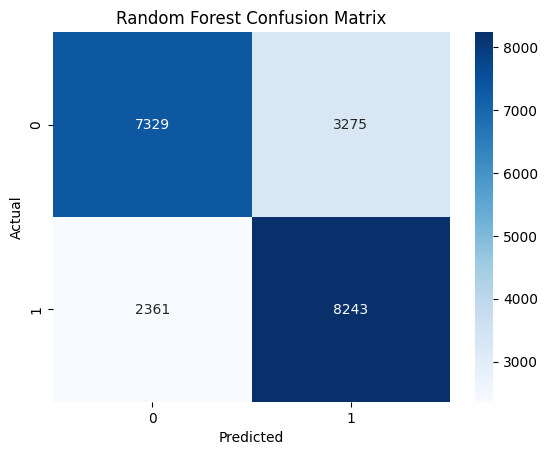


=== Gradient Boosting ===
Accuracy: 0.7532
Precision: 0.7322
Recall: 0.7983
F1 Score: 0.7638
ROC AUC: 0.8299

Confusion Matrix:


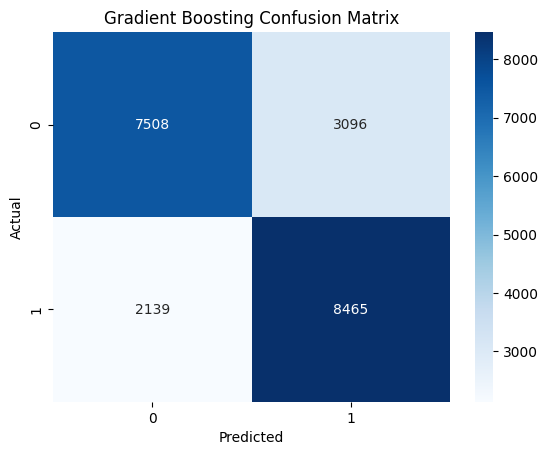


=== XGBoost ===
Accuracy: 0.7459
Precision: 0.6958
Recall: 0.8737
F1 Score: 0.7747
ROC AUC: 0.8291

Confusion Matrix:


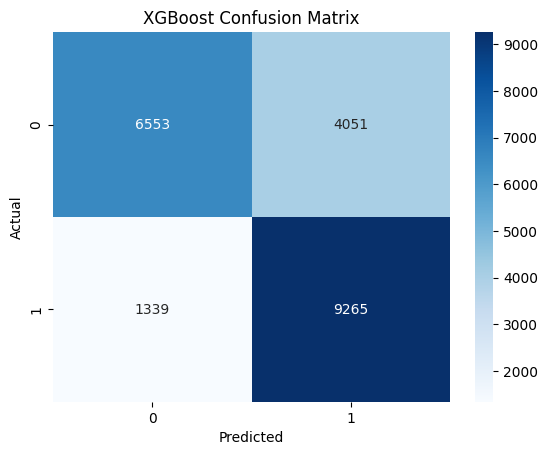


=== Voting Classifier ===
Accuracy: 0.7515
Precision: 0.7174
Recall: 0.8299
F1 Score: 0.7695
ROC AUC: 0.8282

Confusion Matrix:


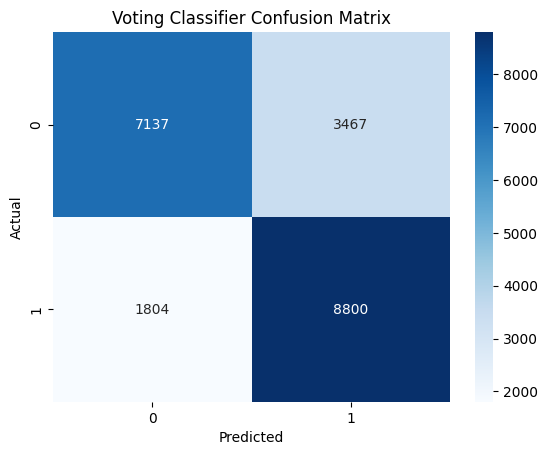


=== Stacking Classifier ===
Accuracy: 0.7508
Precision: 0.7328
Recall: 0.7892
F1 Score: 0.7600
ROC AUC: 0.8281

Confusion Matrix:


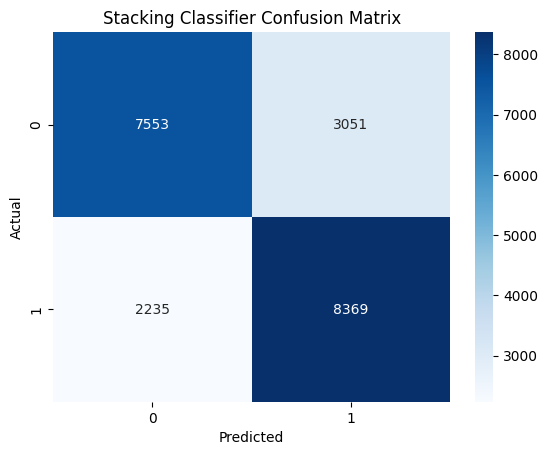


=== Performance Comparison Table ===
                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0        Random Forest  0.734251   0.715662  0.777348  0.745231  0.808439
1    Gradient Boosting  0.753159   0.732203  0.798284  0.763817  0.829870
2              XGBoost  0.745851   0.695780  0.873727  0.774666  0.829083
3    Voting Classifier  0.751462   0.717372  0.829876  0.769533  0.828168
4  Stacking Classifier  0.750754   0.732837  0.789230  0.759989  0.828130


In [14]:
# ==========================
# 5. Evaluate Models
# ==========================
# Evaluate models on the test set and compare their performance.

# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define evaluation function
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    cm = confusion_matrix(y_test, y_pred)

    # Print metrics
    print(f"\n=== {model_name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if auc:
        print(f"ROC AUC: {auc:.4f}")
    print("\nConfusion Matrix:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

    return {"Model": model_name, "Accuracy": acc, "Precision": precision, "Recall": recall, "F1 Score": f1, "AUC": auc}

# Define the models dictionary
# This stores all trained models for easy access during evaluation
models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model,
    'Voting Classifier': voting_model,
    'Stacking Classifier': stacking_model
}

# Evaluate all models and collect results
performance_results = []
for name, model in models.items():
    result = evaluate_model(model, X_test, y_test, name)
    performance_results.append(result)

# Convert the results to a DataFrame
performance_df = pd.DataFrame(performance_results)

# Display the performance comparison table
print("\n=== Performance Comparison Table ===")
print(performance_df)

# Save the results to a CSV file for documentation
performance_df.to_csv("model_performance_comparison.csv", index=False)

In [ ]:
# ==========================
# 5. Evaluate Models (Metrics: Accuracy, Precision, Recall, F1-Score)
# ==========================

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define the models and their predictions on the test set
metrics = {
    'Model': ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Voting Classifier', 'Stacking Classifier'],
    'Accuracy': [
        accuracy_score(y_test, rf_model.predict(X_test)),
        accuracy_score(y_test, gb_model.predict(X_test)),
        accuracy_score(y_test, xgb_model.predict(X_test)),
        accuracy_score(y_test, voting_model.predict(X_test)),
        accuracy_score(y_test, stacking_model.predict(X_test))
    ],
    'Precision': [
        precision_score(y_test, rf_model.predict(X_test), average='weighted'),
        precision_score(y_test, gb_model.predict(X_test), average='weighted'),
        precision_score(y_test, xgb_model.predict(X_test), average='weighted'),
        precision_score(y_test, voting_model.predict(X_test), average='weighted'),
        precision_score(y_test, stacking_model.predict(X_test), average='weighted')
    ],
    'Recall': [
        recall_score(y_test, rf_model.predict(X_test), average='weighted'),
        recall_score(y_test, gb_model.predict(X_test), average='weighted'),
        recall_score(y_test, xgb_model.predict(X_test), average='weighted'),
        recall_score(y_test, voting_model.predict(X_test), average='weighted'),
        recall_score(y_test, stacking_model.predict(X_test), average='weighted')
    ],
    'F1 Score': [
        f1_score(y_test, rf_model.predict(X_test), average='weighted'),
        f1_score(y_test, gb_model.predict(X_test), average='weighted'),
        f1_score(y_test, xgb_model.predict(X_test), average='weighted'),
        f1_score(y_test, voting_model.predict(X_test), average='weighted'),
        f1_score(y_test, stacking_model.predict(X_test), average='weighted')
    ]
}

# Convert to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)

# Display the performance metrics
print("Performance Metrics for Models:")
print(metrics_df)

# Save the results to a CSV file for documentation
metrics_df.to_csv("model_performance_metrics.csv", index=False)


Performance Metrics for Models:
                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.734251   0.736005  0.734251  0.733757
1    Gradient Boosting  0.753159   0.755238  0.753159  0.752656
2              XGBoost  0.745851   0.763057  0.745851  0.741626
3    Voting Classifier  0.751462   0.757802  0.751462  0.749924
4  Stacking Classifier  0.750754   0.752248  0.750754  0.750385


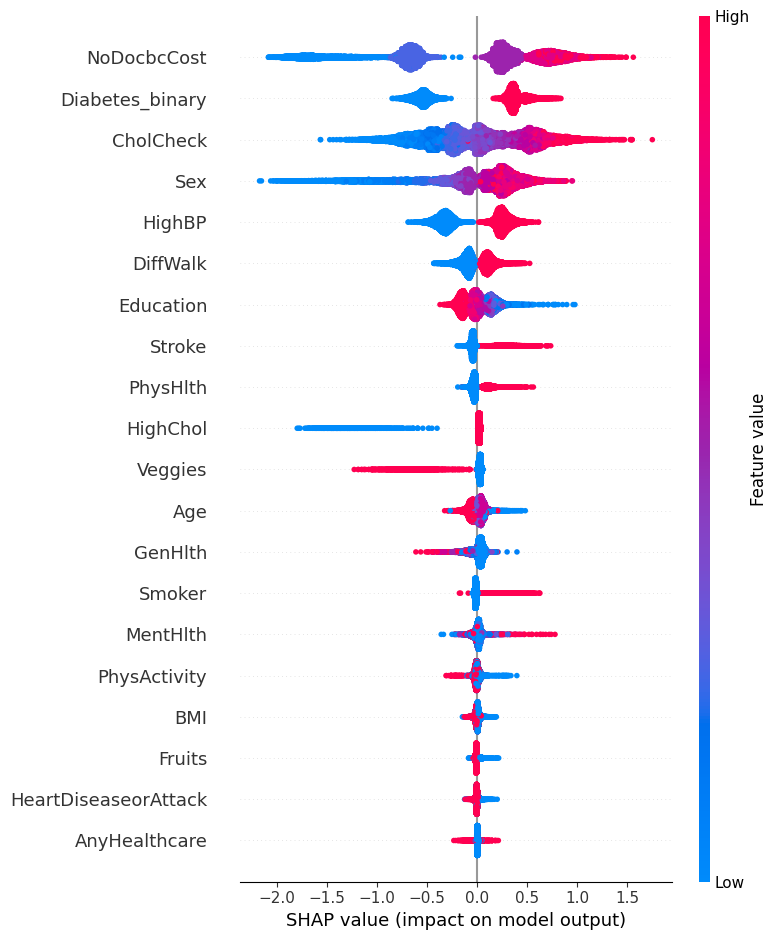

SHAP analysis completed.


In [15]:
# ==========================
# 6. Explainable AI (SHAP)
# ==========================
# Global and local interpretability with SHAP.

# SHAP for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Global feature importance
shap.summary_plot(shap_values, X_test, feature_names=data.columns[:-1])

# Local feature explanation (first test instance)
test_instance = X_test[0]
shap.force_plot(
    explainer.expected_value,
    shap_values[0],
    test_instance,
    feature_names=data.columns[:-1]
)

print("SHAP analysis completed.")


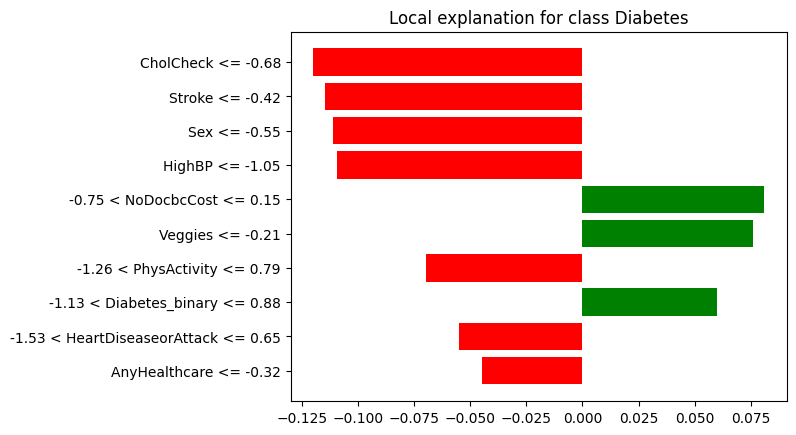

LIME analysis completed.


In [16]:
# ==========================
# 7. Explainable AI (LIME)
# ==========================
# Local interpretability with LIME.

lime_explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=data.columns[:-1],
    class_names=["No Diabetes", "Diabetes"],
    mode="classification"
)

lime_exp = lime_explainer.explain_instance(
    data_row=X_test[0],
    predict_fn=xgb_model.predict_proba,
    num_features=10
)
lime_exp.show_in_notebook(show_table=True)
lime_exp.as_pyplot_figure()
plt.show()

print("LIME analysis completed.")


In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Function to perform RandomizedSearchCV for a model
def perform_random_search(model, param_grid, model_name, n_iter=20):
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=n_iter,  # Number of random combinations to try
        scoring="accuracy",
        cv=3,  # Reduce the number of folds to speed up
        verbose=1,
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best score for {model_name}: {random_search.best_score_:.4f}")
    return random_search.best_estimator_

# Define the parameter grids for each model
param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
}

# Perform RandomizedSearchCV for each model
optimized_models = {
    "Random Forest": perform_random_search(RandomForestClassifier(random_state=42), param_grids["Random Forest"], "Random Forest", n_iter=10),
    "Gradient Boosting": perform_random_search(GradientBoostingClassifier(random_state=42), param_grids["Gradient Boosting"], "Gradient Boosting", n_iter=10),
    "XGBoost": perform_random_search(XGBClassifier(eval_metric="logloss", random_state=42), param_grids["XGBoost"], "XGBoost", n_iter=10),
}

print("Hyperparameter tuning completed.")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Best score for Random Forest: 0.7502
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for Gradient Boosting: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.2}
Best score for Gradient Boosting: 0.7530
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Best score for XGBoost: 0.7528
Hyperparameter tuning completed.


Evaluating Random Forest (Optimized)...

=== Random Forest (Optimized) ===
Accuracy: 0.7489
Precision: 0.7264
Recall: 0.7988
F1 Score: 0.7608
ROC AUC: 0.8266

Confusion Matrix:


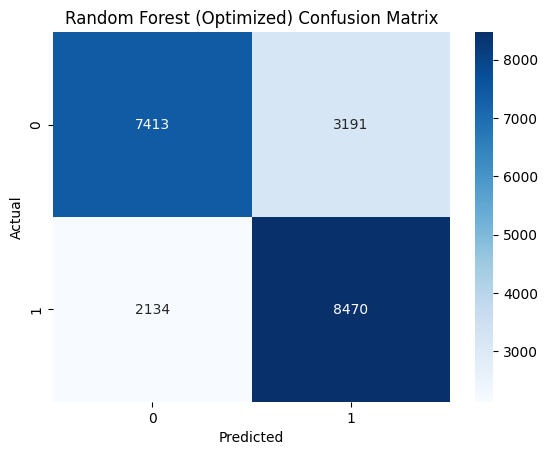

Evaluating Gradient Boosting (Optimized)...

=== Gradient Boosting (Optimized) ===
Accuracy: 0.7540
Precision: 0.7321
Recall: 0.8012
F1 Score: 0.7651
ROC AUC: 0.8296

Confusion Matrix:


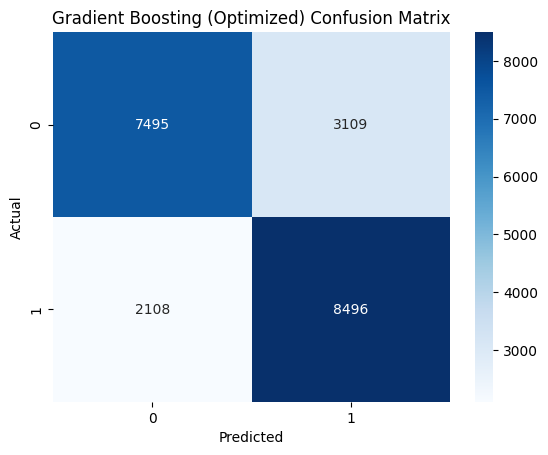

Evaluating XGBoost (Optimized)...

=== XGBoost (Optimized) ===
Accuracy: 0.7538
Precision: 0.7320
Recall: 0.8006
F1 Score: 0.7648
ROC AUC: 0.8303

Confusion Matrix:


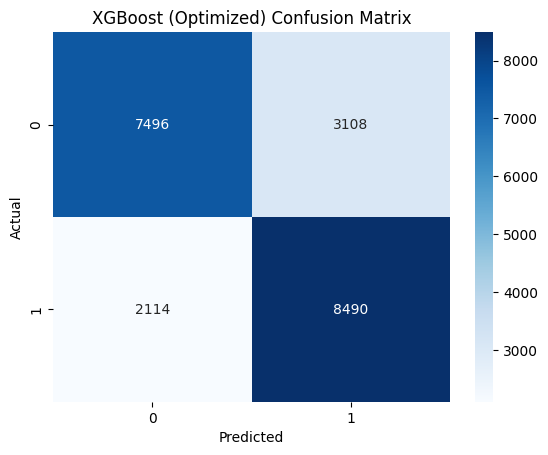


Optimized Models Performance:
                                           Model  Accuracy Precision  \
Random Forest          Random Forest (Optimized)  0.748916  0.726353   
Gradient Boosting  Gradient Boosting (Optimized)  0.754008  0.732098   
XGBoost                      XGBoost (Optimized)  0.753772  0.732023   

                     Recall  F1 Score       AUC  
Random Forest      0.798755  0.760835  0.826592  
Gradient Boosting  0.801207  0.765095  0.829604  
XGBoost            0.800641  0.764796  0.830323  


In [20]:
# =======================================
# Evaluate Optimized Models on Test Data
# =======================================

# Evaluate each optimized model
optimized_results = {}
for name, model in optimized_models.items():
    print(f"Evaluating {name} (Optimized)...")
    optimized_results[name] = evaluate_model(model, X_test, y_test, f"{name} (Optimized)")

# Convert results to a DataFrame
optimized_results_df = pd.DataFrame(optimized_results).T
print("\nOptimized Models Performance:")
print(optimized_results_df)


In [22]:
# =============================
# Combine and Compare Results
# =============================

# Define a function to evaluate the optimized models and store the results in a DataFrame
def evaluate_optimized_models(models, X_test, y_test):
    optimized_results = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
        optimized_results[name] = {
            "Accuracy": acc,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "AUC": auc
        }
    return pd.DataFrame(optimized_results).T

# Assuming 'optimized_models' is a dictionary with the optimized models
optimized_results_df = evaluate_optimized_models(optimized_models, X_test, y_test)

# Initialize an empty DataFrame if `results_df` doesn't exist
try:
    results_df  # Check if results_df exists
except NameError:
    results_df = pd.DataFrame()  # Create an empty DataFrame if it doesn't exist
    print("`results_df` was not found. Creating an empty DataFrame.")

# Combine original and optimized results
combined_results = results_df.join(optimized_results_df, lsuffix="_Original", rsuffix="_Optimized")

# Display results as a comparison table
print("\nComparison Table (Original vs Optimized):")
print(combined_results)

# Save the comparison table to a CSV file for documentation
combined_results.to_csv("model_comparison.csv", index=True)

`results_df` was not found. Creating an empty DataFrame.

Comparison Table (Original vs Optimized):
Empty DataFrame
Columns: [Accuracy, Precision, Recall, F1 Score, AUC]
Index: []


In [25]:
# =============================
# Combine and Compare Results
# =============================

# Define a function to evaluate the optimized models and store the results in a DataFrame
def evaluate_optimized_models(models, X_test, y_test):
    optimized_results = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
        optimized_results[name] = {
            "Accuracy": acc,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "AUC": auc
        }
    return pd.DataFrame(optimized_results).T

# Assuming 'optimized_models' is a dictionary with the optimized models
optimized_results_df = evaluate_optimized_models(optimized_models, X_test, y_test)

# Initialize an empty DataFrame if `results_df` doesn't exist
# Check if results_df is defined, if not create it with the same structure as optimized_results_df
if 'results_df' not in locals():
    # Create an empty DataFrame with the same columns as optimized_results_df
    results_df = pd.DataFrame(columns=optimized_results_df.columns, index=optimized_results_df.index)
    print("`results_df` was not found. Creating an empty DataFrame with the same columns as optimized_results_df.")

# Combine original and optimized results
# Using concat instead of join ensures data is preserved even if no common index
combined_results = pd.concat([results_df, optimized_results_df], axis=1, keys=['Original', 'Optimized'])

# Display results as a comparison table
print("\nComparison Table (Original vs Optimized):")
print(combined_results)

# Save the comparison table to a CSV file for documentation
combined_results.to_csv("model_comparison.csv", index=True)


Comparison Table (Original vs Optimized):
                  Optimized                                        
                   Accuracy Precision    Recall  F1 Score       AUC
Random Forest      0.748916  0.726353  0.798755  0.760835  0.826592
Gradient Boosting  0.754008  0.732098  0.801207  0.765095  0.829604
XGBoost            0.753772  0.732023  0.800641  0.764796  0.830323
